# Covid affact to different countries

## Introduction

Since the begining of the 2020, people all arround the world had been sufuring from Cov-19. Different country are in different conditions and deal with the pandemic variously. We try to explain why some countries have done so much better than others, why some factors might has affect the result of dealing with covid 19.

## Introducing data

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
%matplotlib inline

# Fixing random state for reproducibility
np.random.seed(19980108)

This dataset is from a Kaggle competation. Here is the link to it.
https://www.kaggle.com/johnharshith/world-happiness-report-2021-worldwide-mortality
This dataset contains the mortality data due to various factors across the globe in different countries from the Ninth World Happiness report (2021). The World Happiness Report 2021 focuses on the effects of COVID-19 and how people all over the world have fared. More information could be found here https://worldhappiness.report/ed/2021/. 

In [282]:
#load data
data = pd.read_csv('WHR_Data2021.csv')
data.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.22
1,Egypt,102334403.0,100388073.0,7.457,25.3,0,1.627,9.007,0,0,0.446,31.56,NaN,NaN,NaN,NaN,NaN
2,Morocco,36910558.0,36471769.0,20.016,29.6,0,2.336,9.226,0,0,0.397,39.55,NaN,NaN,NaN,NaN,NaN
3,Lebanon,6825442.0,6855713.0,21.508,31.1,0,1.891,8.956,0,0,0.107,31.83,NaN,NaN,NaN,NaN,NaN
4,Saudi Arabia,34813867.0,34268528.0,17.875,31.9,0,1.250,8.897,0,0,0.651,45.90,NaN,NaN,NaN,NaN,NaN


In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 17 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Country name                                                                 166 non-null    object 
 1   Population 2020                                                              164 non-null    float64
 2   Population 2019                                                              164 non-null    float64
 3   COVID-19 deaths per 100,000 population in 2020                               163 non-null    float64
 4   Median age                                                                   163 non-null    float64
 5   Island                                                                       166 non-null    int64  
 6   Index of exposure to COVID-19  infections 

some explainations of the columns:

* `Island` if a country is an island or not.
* `Index of exposure to COVID-19  infections in other countries as of March 31` Finding the index of exposure of COVID-19 infections in the corresponding country
* `Log of average distance to SARS countries ` Log of the average distance to SARS countries
* `WHO Western Pacific Region` Checking if it is a WHO Western Pacific region or not one
* `Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average` Excess deaths in 2020 per 100,000 population relative to 2017-2019 average
* `Gini coefficient of income` a measure of inequality, larger value means heavier inequality.

In [284]:
#data cleaning
#Here we drop those rows since some countries or regions is not accessable.  
df=data.dropna()
df.index = range(len(df))
df.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.220
1,United Kingdom,67886004.0,66834405.0,108.450,40.8,1,5.009,9.087,0,0,0.268,34.07,606874.0,613309.0,600532.0,696705.0,133.313
2,France,65273512.0,67059887.0,99.212,42.0,0,5.031,9.092,0,0,0.234,29.30,604105.0,607786.0,611291.0,678259.0,106.597
3,Germany,83783945.0,83132799.0,40.331,46.6,0,4.838,9.018,0,1,0.435,31.10,929351.0,952295.0,936772.0,1000855.0,73.548
4,Netherlands,17134873.0,17332850.0,67.260,43.2,0,5.574,9.060,0,0,0.522,27.00,149805.0,152991.0,151547.0,171175.0,114.468


## Factors might affact the country's covid infection

### Does a country with higher median age suffer more?

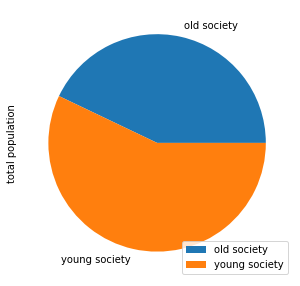

In [285]:
#total population comparation 2020
#we define a society is old if the median age is above 40.
old_df=df.loc[df['Median age']>40]
old_sum=old_df['Population 2020'].sum()

young_df=df.loc[df['Median age']<40]
young_sum=young_df['Population 2020'].sum()

df_age_compare = pd.DataFrame({'total population': [old_sum, young_sum]},
                  index=['old society', 'young society'])
plot = df_age_compare.plot.pie(y='total population', figsize=(5, 5))
plt.legend(loc="lower right")

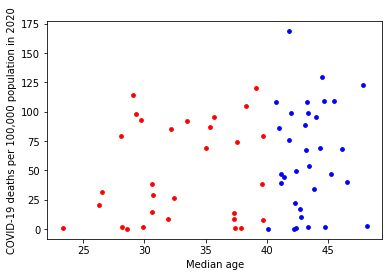

In [286]:
x=old_df['Median age']
y=old_df['COVID-19 deaths per 100,000 population in 2020']

a=young_df['Median age']
b=young_df['COVID-19 deaths per 100,000 population in 2020']

plt.scatter(x, y, alpha=1,color='blue',s=14)
plt.scatter(a, b, alpha=1,color='red',s=14)
plt.xlabel('Median age') 
plt.ylabel('COVID-19 deaths per 100,000 population in 2020') 
plt.show()

From the figure above we can see that a country with a higher median age might not have a larger death rate than a country with younger median age, this might because society with a higher median age have better medical service.

### Does an Island country suffer less?

Island countries, like the UK, and Australia, are easier to control the entry of the boarder, to reduce traveling between countries. Thus might be easier to control the spead of Cov-19, which mignt lead to a smaller death rate due to Cov-19.

<AxesSubplot:xlabel='Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average', ylabel='COVID-19 deaths per 100,000 population in 2020'>

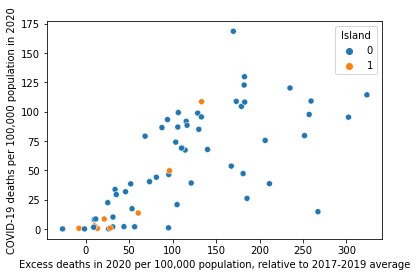

In [287]:
sns.scatterplot(data=df, 
                x='Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average',
                y='COVID-19 deaths per 100,000 population in 2020', 
                hue="Island")

<AxesSubplot:title={'center':'COVID-19 deaths per 100,000 population in 2020'}, xlabel='[Island]'>

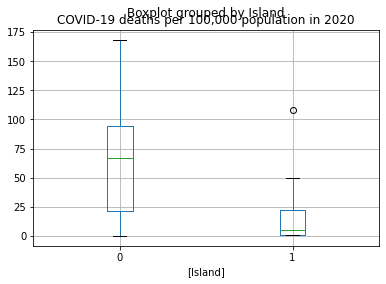

In [288]:
boxplot = df.boxplot(column=['COVID-19 deaths per 100,000 population in 2020'], by = ['Island'])
boxplot

from the box plot we can see that island countries do have a smaller median value than countries those are not an island, and the death rate is smaller as well. This may indicate that island countries, to some extent, do have some advatages over those non-island countries to avoid death caused by covid. This could be explained that, once the airports and the piers got shut down, there are less ways to travel to another country, traveling could be controlled, thus control the spread of covid.

### Does a country with lower income inequality suffer less?

Will income inequality affect the death of pandemic? Probabily. Theoretically, a lower income inequality might lead to a kind relationship between people, and less Social contradiction. Thus the society might be easier to face to the pandemic and has a smaller rate of death caused by Covid.

<AxesSubplot:xlabel='Gini coefficient of income', ylabel='COVID-19 deaths per 100,000 population in 2020'>

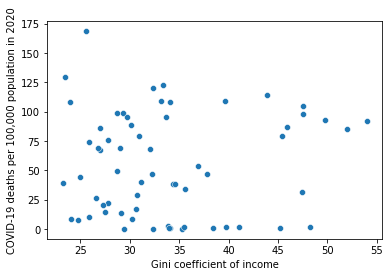

In [289]:
sns.scatterplot(data=df, 
                x='Gini coefficient of income',
                y='COVID-19 deaths per 100,000 population in 2020')

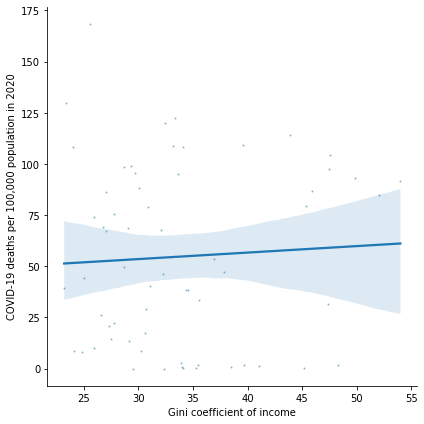

In [290]:
# when we try to fit a model...
sns.lmplot(
    data=df, x='Gini coefficient of income', y='COVID-19 deaths per 100,000 population in 2020', height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
);

from the two figures above, we cannot find a relationship between the Gini coefficient of income and the covid death rate, the data are widely spreaded. This could be explained. For example, both developed and developing countries could have a low Gini coefficient of income, for example, Netherlands and Tajikistan, a developed country like Netherlands have better medical and hospital system while developing country don't. 

### Does WHO Western Pacific Region did better than other regions?

<AxesSubplot:xlabel='COVID-19 deaths per 100,000 population in 2020', ylabel='Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average'>

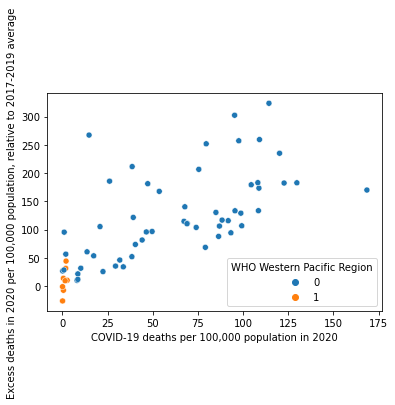

In [291]:
sns.scatterplot(data=df, 
                x='COVID-19 deaths per 100,000 population in 2020', 
                y='Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average', 
                hue="WHO Western Pacific Region")

The East Asian countries are outperforming the western world. Despite the fact that the outbreak began in China, to which the rest of East Asia is very closely bound by trade and travel. 

### top 10 country that have highest death per 100000 people

In [292]:
df_top10=df.sort_values('COVID-19 deaths per 100,000 population in 2020',ascending=False).head(10)
df_top10

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
5,Belgium,11589616.0,11484055.0,168.496,41.8,0,6.343,9.071,0,0,0.303,25.60,109278.0,110341.0,108436.0,128952.0,169.894
58,Slovenia,2078932.0,2087946.0,129.730,44.5,0,4.308,9.045,0,0,0.177,23.40,20436.0,20428.0,20547.0,24277.0,182.711
7,Italy,60461828.0,60297396.0,122.654,47.9,0,5.501,9.078,0,0,0.076,33.40,656891.0,638884.0,642964.0,756317.0,182.298
44,North Macedonia,2083380.0,2083459.0,120.141,39.1,0,2.875,9.022,0,0,0.105,32.40,20318.0,19727.0,20412.0,25049.0,235.030
53,Peru,32971846.0,32510453.0,114.279,29.1,0,0.636,9.690,0,0,0.096,43.90,98704.0,112516.0,114560.0,214503.0,323.476
32,Bulgaria,6948445.0,6975761.0,109.032,44.7,0,2.692,9.007,0,0,0.073,39.60,109330.0,108247.0,107849.0,126525.0,259.256
6,Spain,46754783.0,47076781.0,108.731,45.5,0,4.332,9.172,0,0,0.143,33.20,420589.0,423994.0,414914.0,501106.0,173.233
1,United Kingdom,67886004.0,66834405.0,108.450,40.8,1,5.009,9.087,0,0,0.268,34.07,606874.0,613309.0,600532.0,696705.0,133.313
10,Czech Republic,10708982.0,10669709.0,108.133,43.3,0,4.817,9.025,0,0,0.290,24.00,111007.0,112604.0,112040.0,131440.0,182.952
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.220


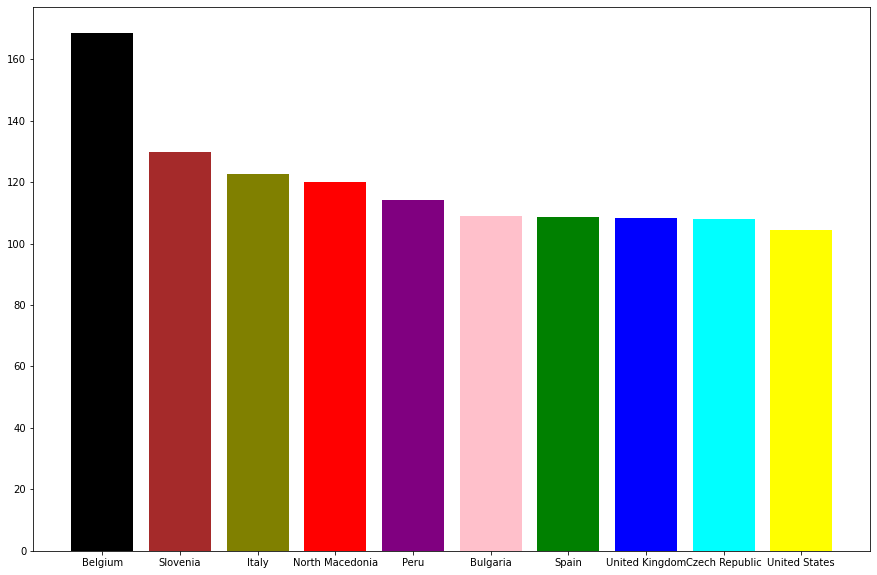

In [293]:
height = df_top10['COVID-19 deaths per 100,000 population in 2020']
bars = df_top10['Country name']
x_pos = np.arange(len(bars))

plt.figure(figsize=(15, 10))
plt.bar(x_pos, height, 
        color=['black','brown', 'olive','red', 'purple','pink','green', 'blue', 'cyan','yellow'])

plt.xticks(x_pos, bars)



plt.show()

### death change from 2017~2020 for the above top 10 countries

Text(0, 0.5, 'death')

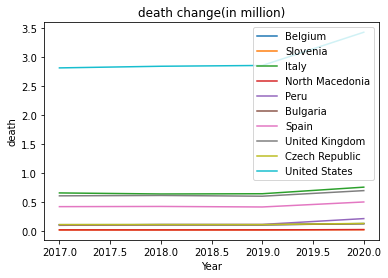

In [294]:
N=list(range(10))

for n in N:
    this_lable=df_top10.iloc[n]['Country name']
    xn = Year
    yn = [df_top10.iloc[n]['All-cause death count, 2017']/(1000000),
        df_top10.iloc[n]['All-cause death count, 2018']/(1000000),
        df_top10.iloc[n]['All-cause death count, 2019']/(1000000),
        df_top10.iloc[n]['All-cause death count, 2020']/(1000000)] 
    plt.plot(xn, yn, label = this_lable)
    plt.legend()

plt.title('death change(in million)')
plt.xlabel('Year')
plt.ylabel('death')

As shown, these countries's death increase obviously in the year 2020.

## Conclusion

* Island country generally did better than other countries
* Country with higher median age does not suffer more
* WHO western pacific region countries did better in fighting with covid 
* income inequally doesnot contribute that much to the death due to covid of a country
* top 10 country that have highest death per 100000 people are 'Belgium','Slovenia','Italy',
 'North Macedonia','Peru','Bulgaria','Spain','United Kingdom','Czech Republic','UnitedStates'

## Reference

https://www.kaggle.com/johnharshith/world-happiness-report-2021-worldwide-mortality

https://worldhappiness.report/ed/2021/

https://www.python-graph-gallery.com/3-control-color-of-barplots